In [1]:
from scipy import stats
import numpy as np

In [2]:
file = open('BL6_stat/bl6.pAs.compare2.txt', 'r') 
gene_predict_usage = {}
gene_exp_usage = {}
for i, line in enumerate(file): 
    if(i>0):
        line=line.rstrip('\n')
        (pas_id,symbol,predict_usage,exp_usage)= line.split('\t')
        gene_predict_usage.setdefault(symbol,[]).append(predict_usage)
        gene_exp_usage.setdefault(symbol,[]).append(exp_usage)

In [3]:
total = 0
high_correlate = 0
wrong_total=0
near = 0
for key,value1 in gene_predict_usage.items():
    #print(value1,value2)
    index1 = np.argsort(value1)
    value2 = gene_exp_usage[key]
    value2 = np.array(value2)
    index2 = np.argsort(value2)
    tau, p_value = stats.weightedtau(index1,index2)
    total += 1
    if(tau > 0.75):
        high_correlate+=1
    else:
        if(len(value1)==2):
            wrong_total += 1
            if(abs(float(value1[0])-float(value1[1]))<0.2):
            #print(float(value1[1]))
                near +=1
print(high_correlate/total)
print(near/wrong_total)

0.16989404457435148
0.33727810650887574


In [4]:
from prep_data_regression import prep_data,DataGenerator
train_data,train_labels,valid_data,valid_labels = prep_data('usage_data/BL6_REP1.pAs.predict.coverage.txt',5)

Size of dataset: 15234


In [7]:
from PolyAModel import *
Path='bestModel/Finetune_k562Tohepg2.hepg2_control_aug8_SC_p1r0.03u0.05_4-0056.ckpt'
model = PolyA_CNN('SC',201,6,12)
model.load_weights(Path)

input_layers = [seq_input,cov_input]


In [3]:
for layer in model.layers:
    print(layer.get_config(), layer.get_weights())

{'batch_input_shape': (None, 201, 4), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'seq_input'} []
{'batch_input_shape': (None, 201, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'cov_input'} []
{'name': 'conv1d', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (6,), 'strides': (1,), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1,), 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0, 'l2': 9.999999747378752e-05}}, 'bias_regularizer': {'class_name': 'L1L2', 'config': {'l1': 0.0, 'l2': 9.999999747378752e-05}}, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[[-0.07752832,  0.25838238, -0.05930882,  0.26944947,
         -0.22487944,  0.02441583,  0.19241416,  0.27344072,
 

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_input (InputLayer)          [(None, 201, 4)]     0                                            
__________________________________________________________________________________________________
cov_input (InputLayer)          [(None, 201, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 196, 32)      800         seq_input[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 196, 32)      224         cov_input[0][0]                  
______________________________________________________________________________________________

In [4]:
i=-1
for layer in model.layers:
    i +=1
    if 'conv' not in layer.name:
        continue
    print(i)   
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

2
conv1d (6, 4, 32)
3
conv1d_1 (6, 1, 32)


In [8]:
bestfilters,biases = model.layers[2].get_weights()

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.
/home/longy/anaconda3/envs/ML/lib/python3.7/site-packages/logomaker/src/Logo.py:194: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1, figsize=self.figsize)


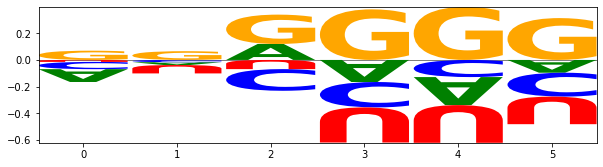

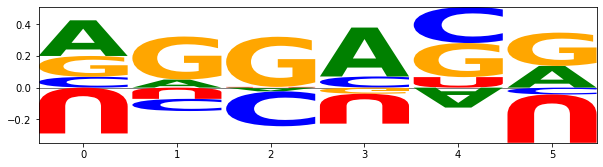

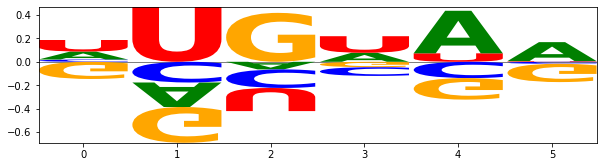

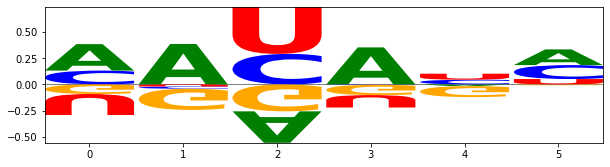

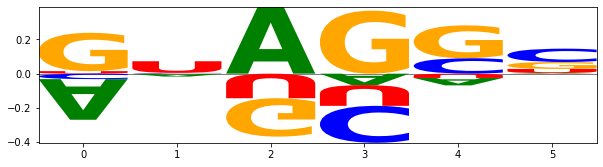

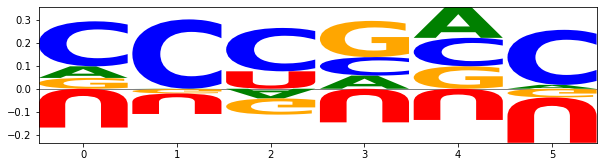

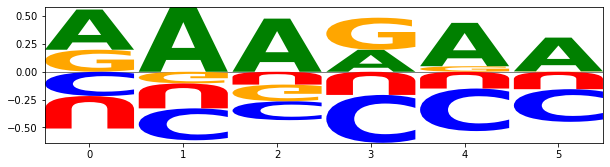

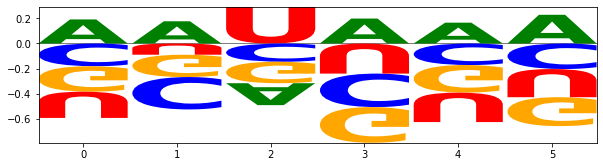

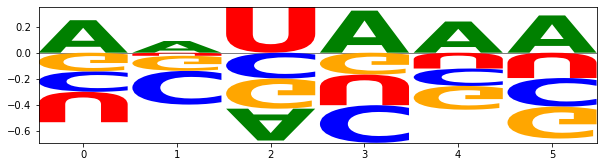

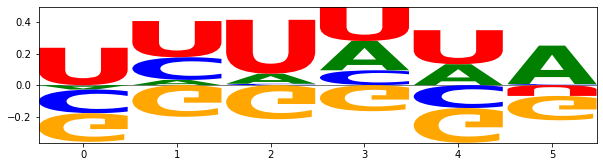

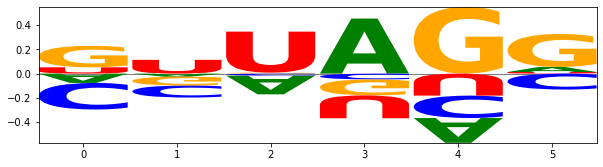

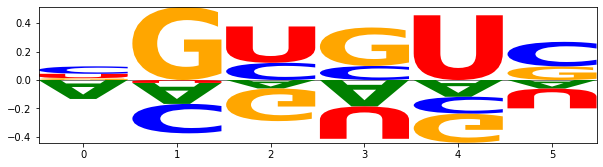

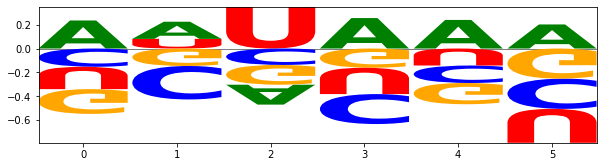

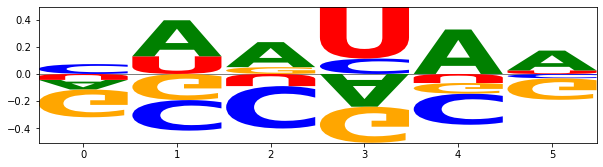

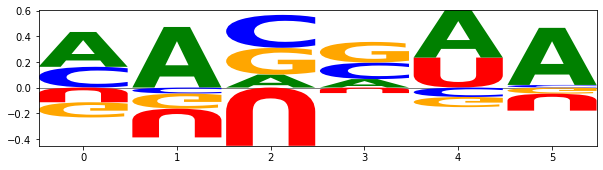

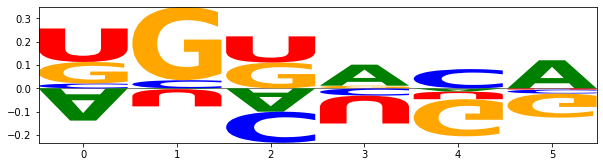

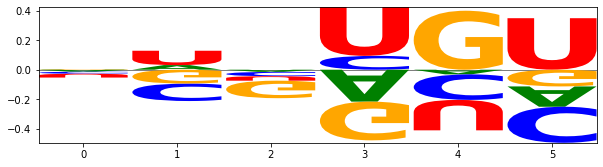

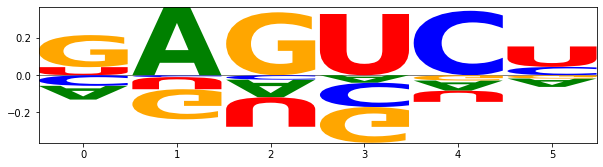

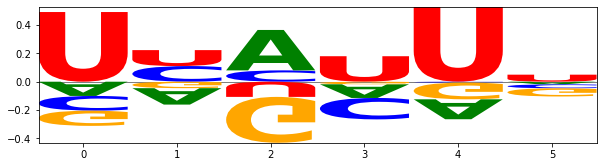

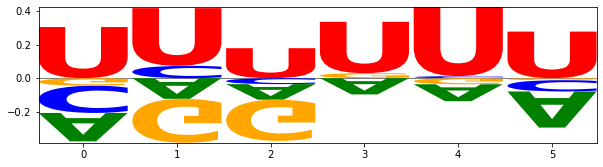

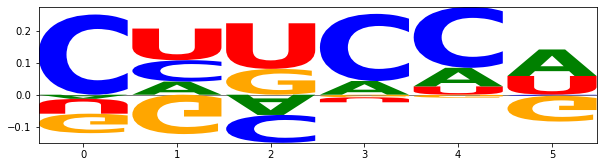

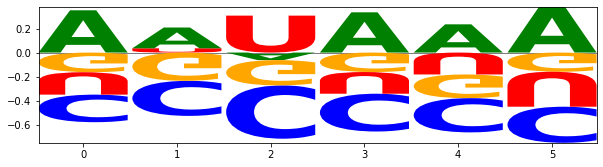

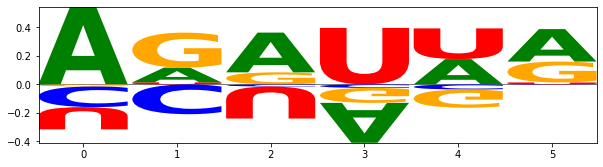

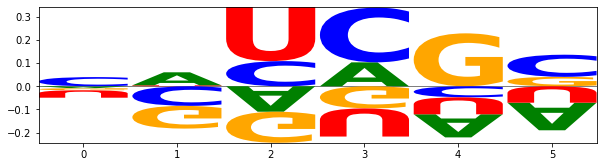

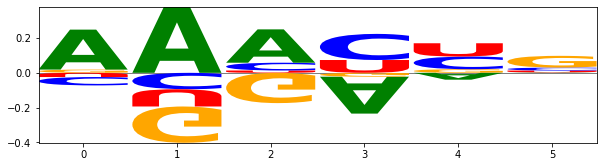

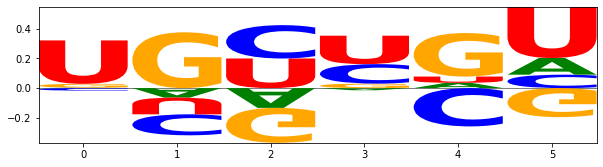

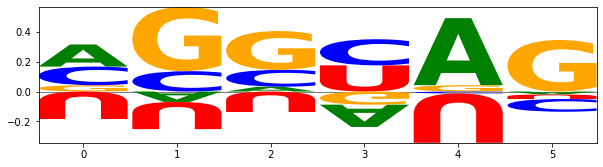

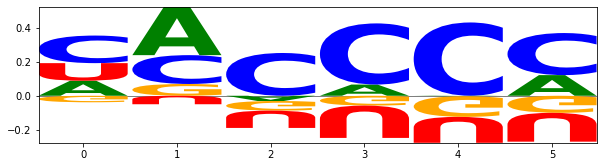

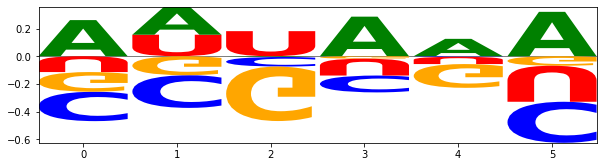

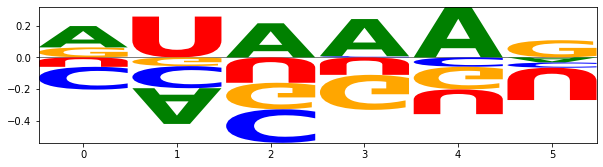

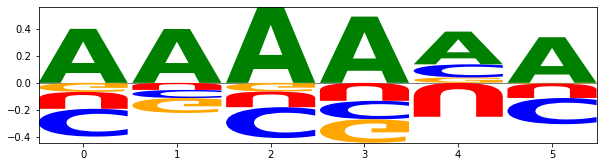

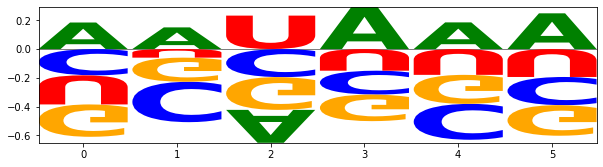

In [11]:
for i in range(bestfilters.shape[2]):
    df = pd.DataFrame(bestfilters[:,:,i], columns = ['A','U','C','G'], index = [0,1,2,3,4,5])
    logo = lm.Logo(df, font_name = 'Arial Rounded MT Bold')

In [32]:
effect=np.zeros(32)
for i in range(32):
    effect[i] = np.max(filters[:,:,i])
index = np.argsort(effect)
index = np.flip(index)
newfilters = filters[:,:,index]
print(newfilters)

[[[-0.1507003  -0.07752832 -0.07856932  0.23138887  0.31960186
   -0.05697029  0.35361928 -0.18958499  0.02775939  0.3778856
   -0.05930882  0.02441583  0.19241416  0.27344072  0.21413022
    0.25838238  0.23097715  0.19202003  0.06567618 -0.01162297
   -0.05735826  0.06018668  0.28643683  0.08745297  0.2535909
   -0.15064779 -0.22487944  0.26944947 -0.17711313  0.26561266
   -0.13017641  0.2551687 ]
  [ 0.3541003  -0.00657399 -0.25179628 -0.1288895   0.06433959
    0.03784047 -0.06412005 -0.17165633 -0.08289435 -0.10086473
    0.04369327  0.09600595  0.010556   -0.15176527 -0.1725453
   -0.09830693 -0.04430652 -0.11270294  0.15174814 -0.07641159
    0.3112936   0.05496526 -0.20957603 -0.17124002 -0.20945565
    0.02180538  0.00402806 -0.17747606  0.16768727 -0.29620308
    0.2626887  -0.20324598]
  [-0.07349344 -0.01120644  0.26147652 -0.08494564 -0.10854305
    0.15316477 -0.203856    0.33281428  0.12417386  0.0246687
   -0.00629989 -0.04141084  0.00569824 -0.11721392 -0.2289251
   -

In [31]:
np.max(newfilters[:,:,0])

0.26561266

In [9]:

# useful imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.ion()

import logomaker as lm


In [8]:
# logomaker method to load example matrices
crp_df = -lm.get_example_matrix('crp_energy_matrix')
crp_df.head()

Description of example matrix "crp_energy_matrix":
# 
# CRP energy matrix from Kinney et al. (2010).
# Matrix values are in units of kcal/mol.
# 
# References
# 
# Kinney JB et al. (2010) Using deep sequencing to characterize the
# biophysical mechanism of a transcriptional regulatory sequence.
# Proc Natl Acad Sci USA. 107(20):9158–63.
# 



A         C         G         T
pos                                        
0    0.183642 -0.155864 -0.094136  0.066358
1    0.290123 -0.277778 -0.111111  0.098765
2    0.276235 -0.316358 -0.168210  0.208333
3    0.226852 -0.285494 -0.297840  0.356481
4    0.060185 -0.143519 -0.057099  0.140432

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


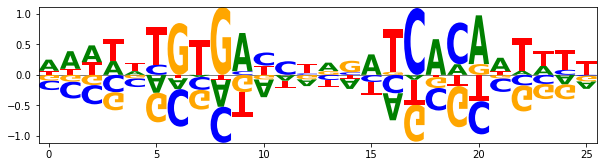

In [9]:
logo = lm.Logo(crp_df, font_name = 'Arial Rounded MT Bold')

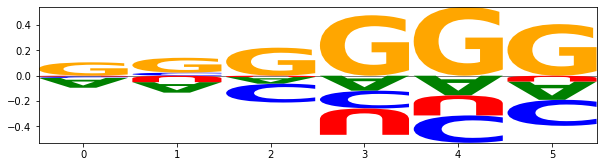

In [22]:
df = pd.DataFrame(filters[:,:,0], columns = ['A','U','C','G'], index = [0,1,2,3,4,5])
logo = lm.Logo(df, font_name = 'Arial Rounded MT Bold')

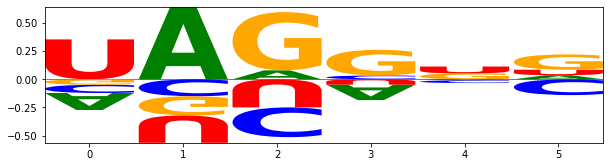

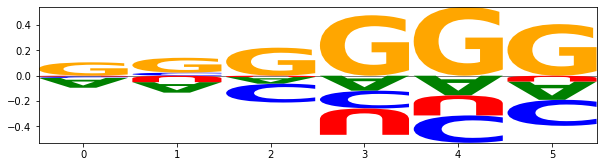

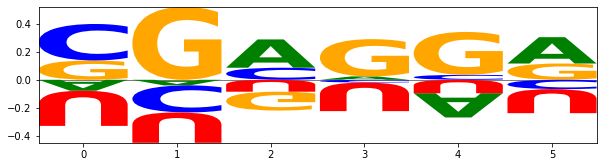

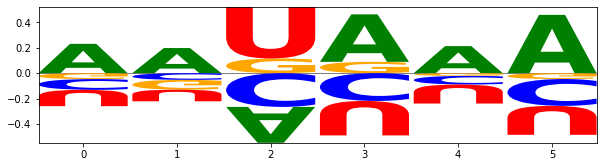

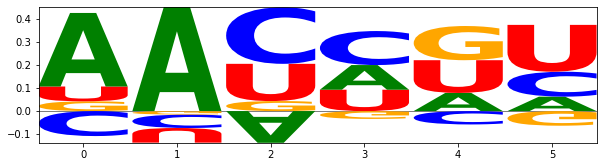

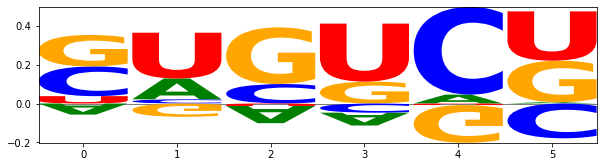

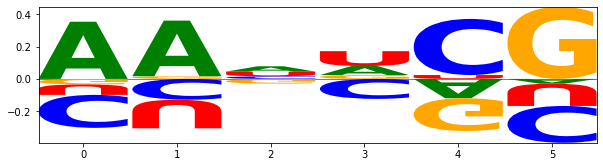

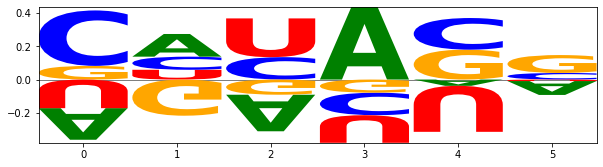

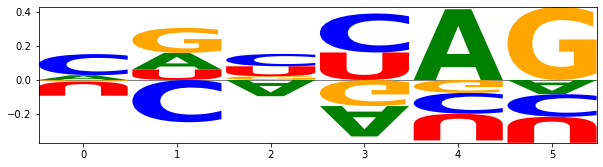

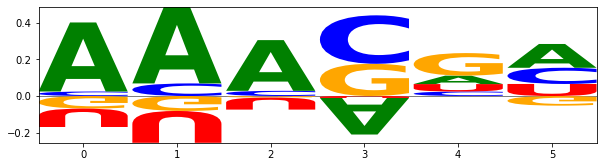

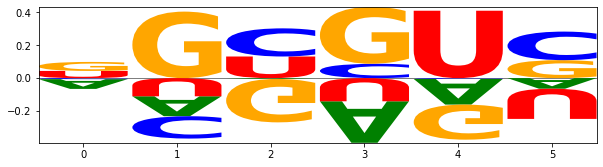

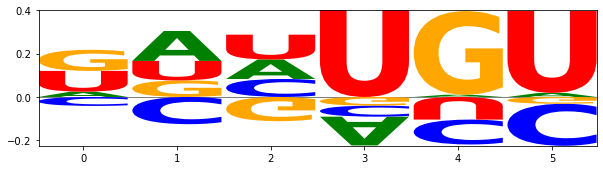

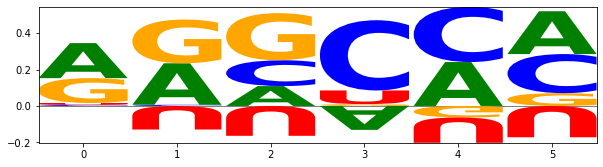

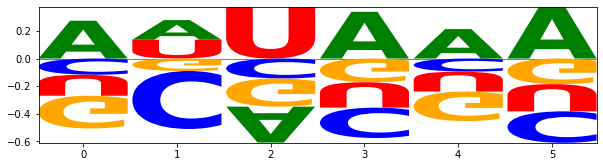

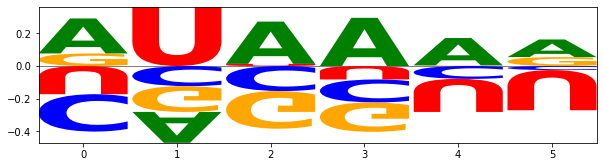

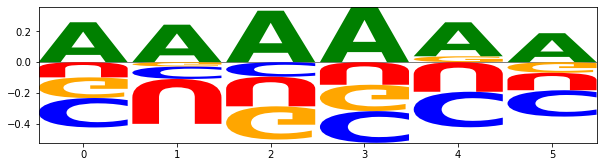

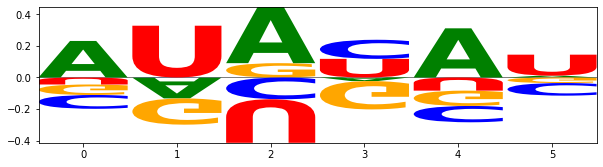

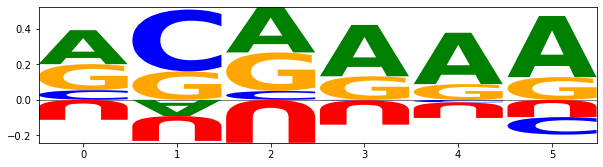

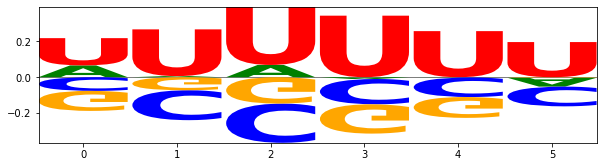

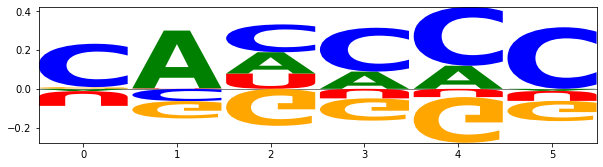

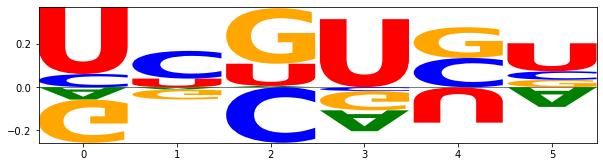

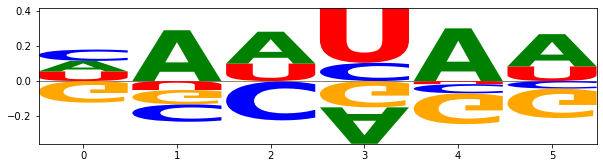

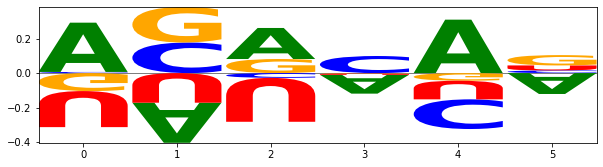

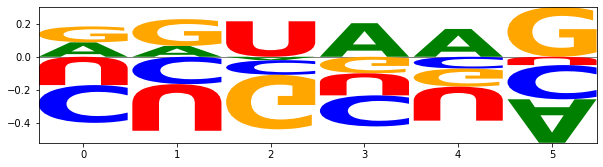

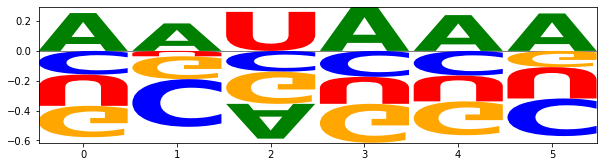

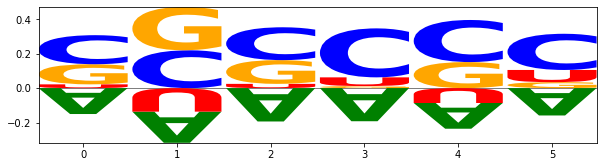

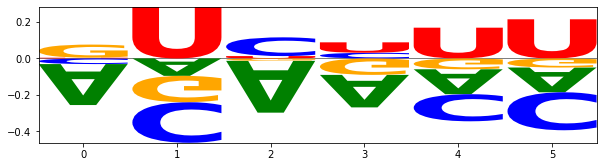

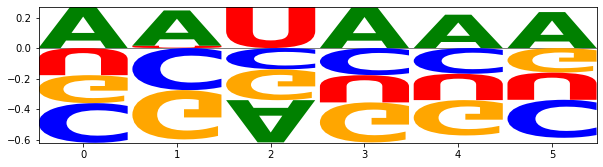

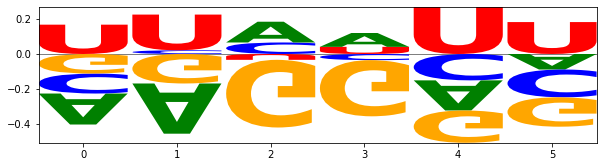

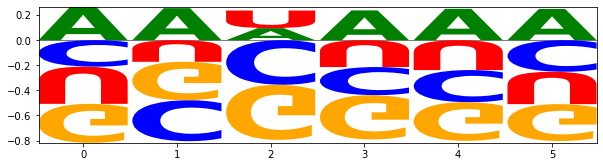

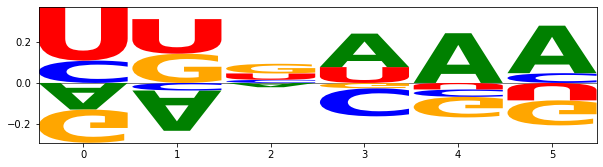

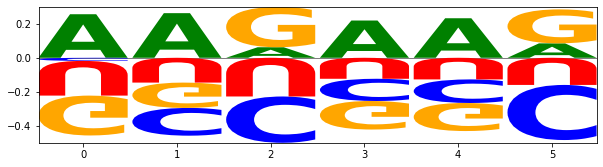

In [34]:
for i in range(newfilters.shape[2]):
    df = pd.DataFrame(newfilters[:,:,i], columns = ['A','U','C','G'], index = [0,1,2,3,4,5])
    logo = lm.Logo(df, font_name = 'Arial Rounded MT Bold')

In [35]:
from PolyAModel import *
Path='Model/HepG2_Control.pAs.single_kermax6.HepG2_Control_aug8_SC_p1r5u0.05_3-0051.ckpt'
model = PolyA_CNN('SC',201,6,6,6)
model.load_weights(Path)

input_layers = [seq_input,cov_input]


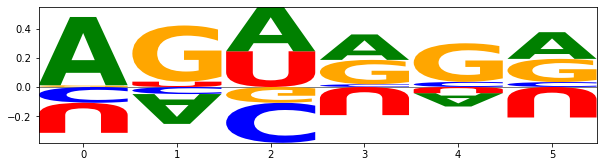

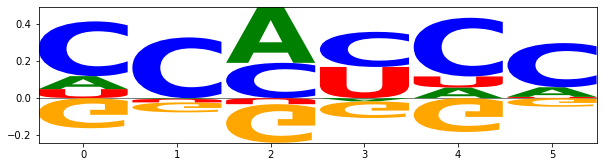

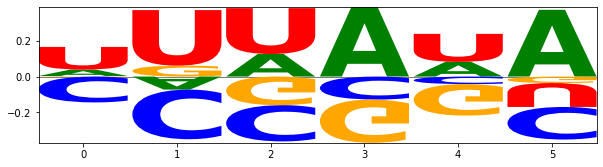

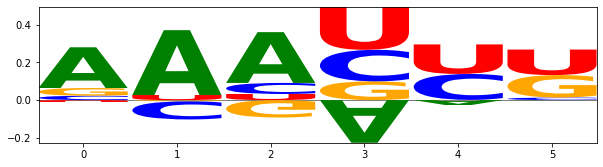

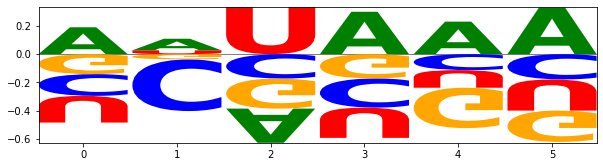

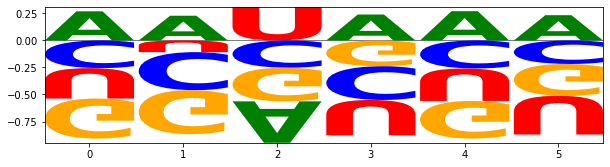

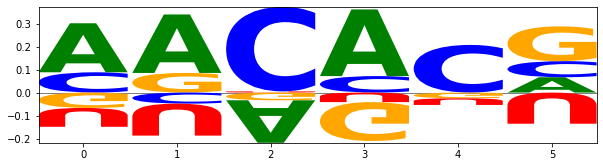

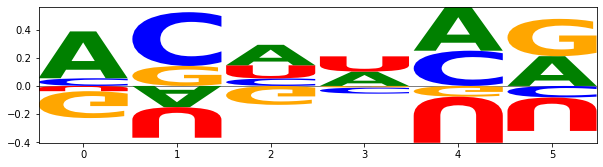

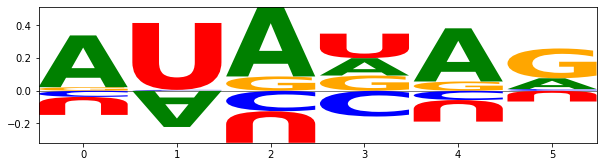

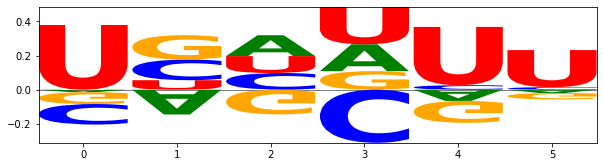

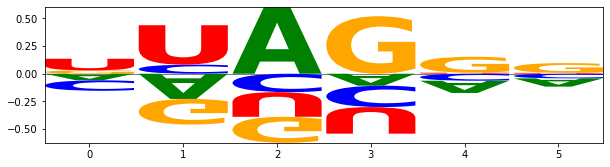

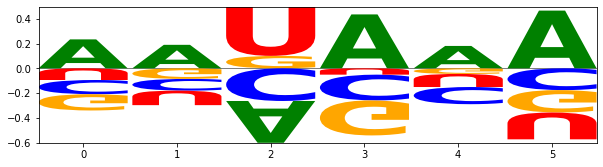

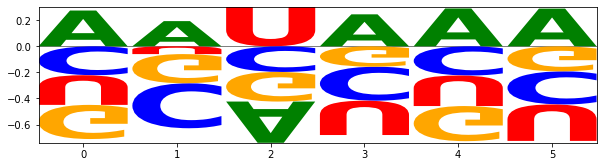

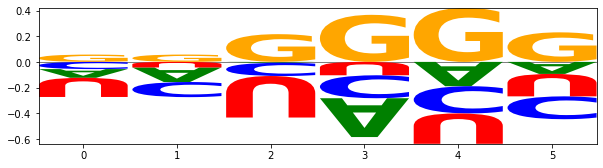

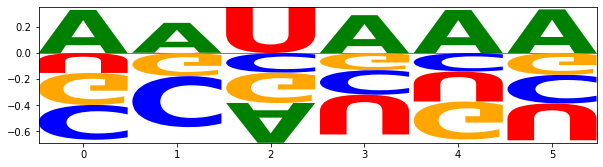

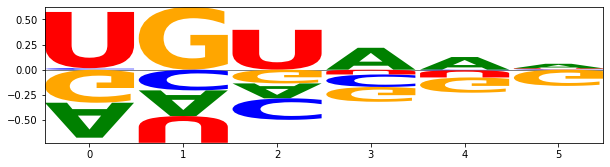

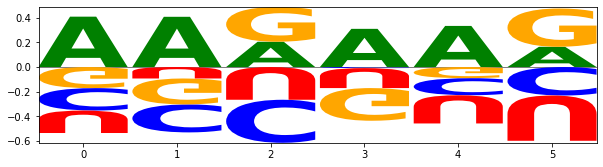

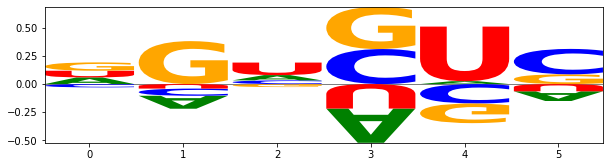

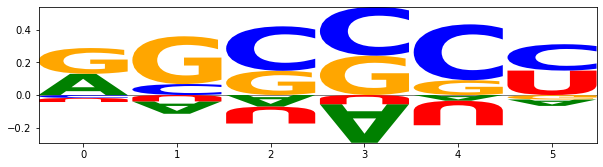

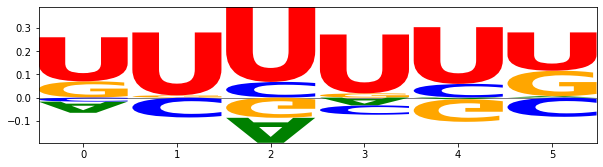

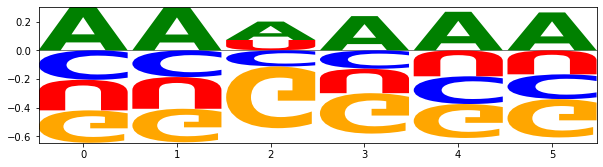

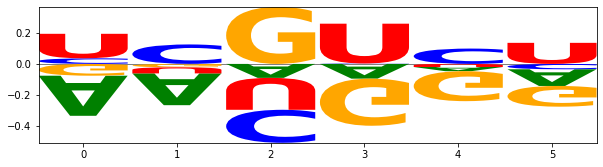

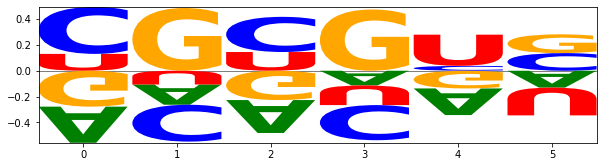

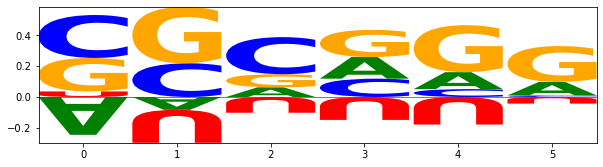

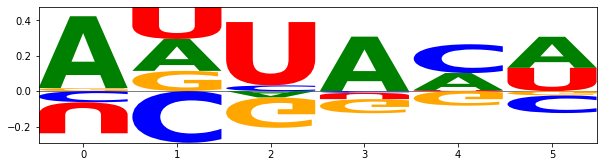

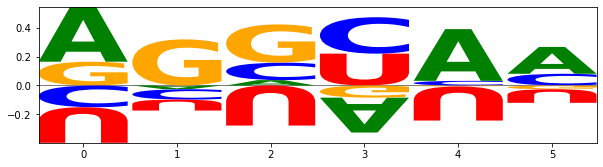

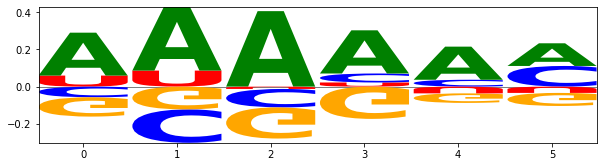

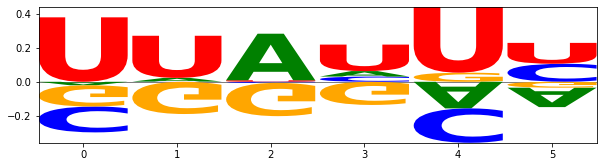

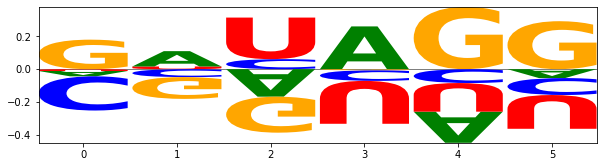

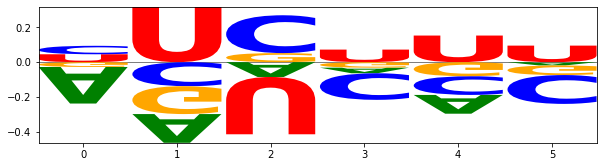

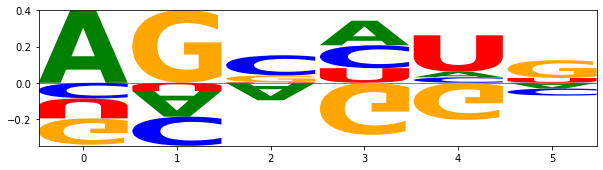

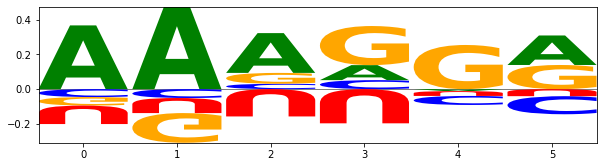

In [36]:
filters,biases = model.layers[2].get_weights()
for i in range(filters.shape[2]):
    df = pd.DataFrame(filters[:,:,i], columns = ['A','U','C','G'], index = [0,1,2,3,4,5])
    logo = lm.Logo(df, font_name = 'Arial Rounded MT Bold')

In [47]:
from PolyAModel import *
Path='Model/BL6_REP1.pAs.single_kermax6.BL6_REP1_aug8_SC_p10r30u0.1_4-0433.ckpt'
model = PolyA_CNN('SC',201,6,6,6)
model.load_weights(Path)

input_layers = [seq_input,cov_input]


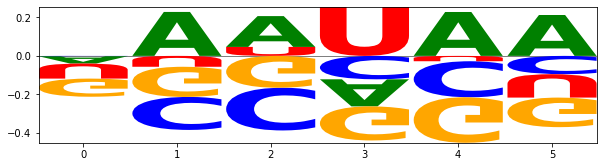

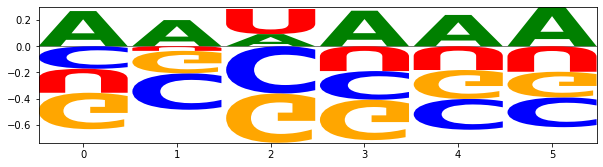

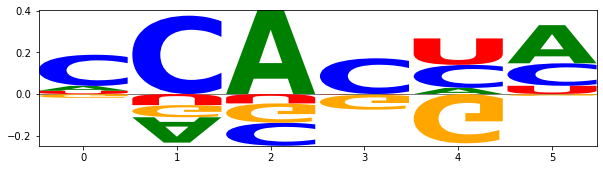

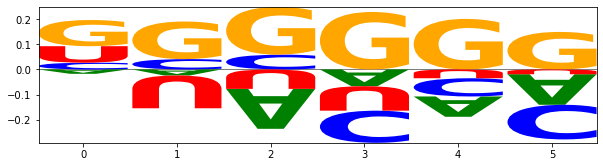

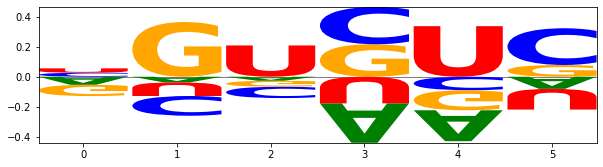

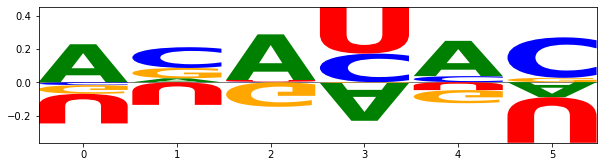

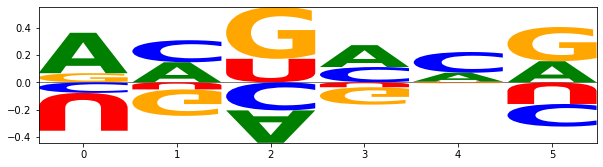

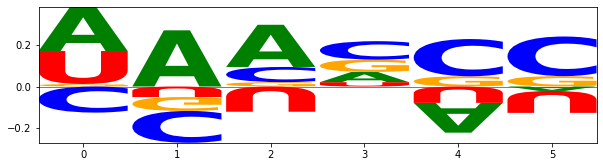

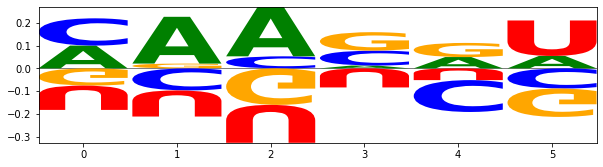

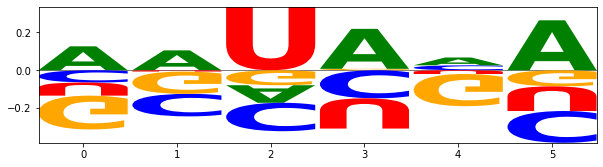

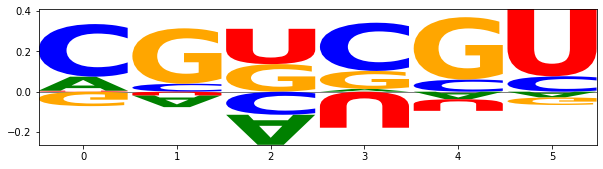

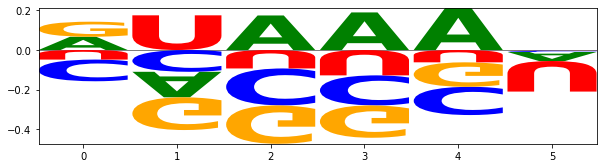

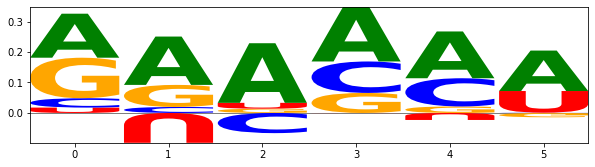

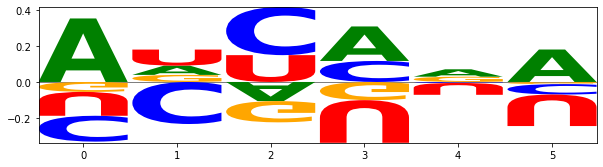

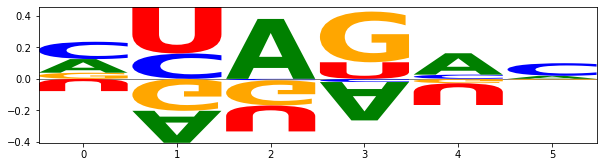

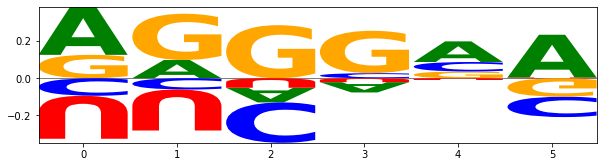

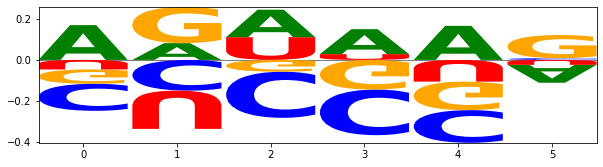

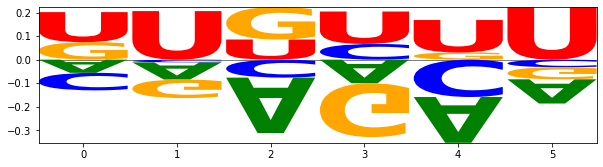

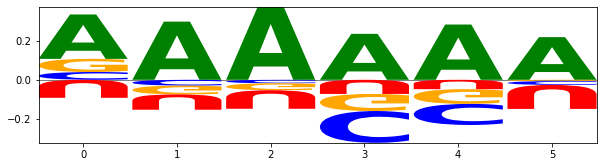

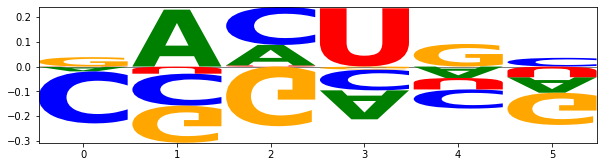

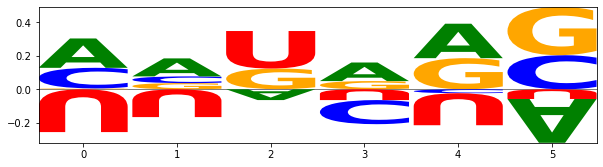

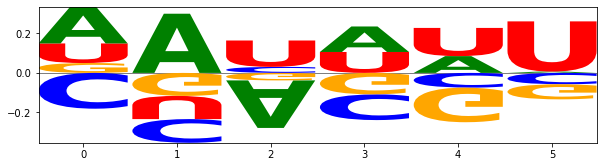

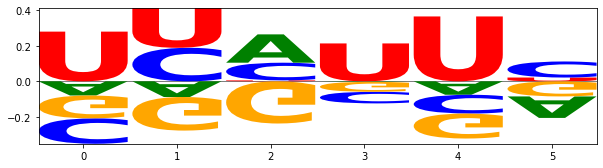

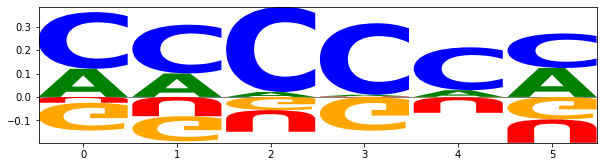

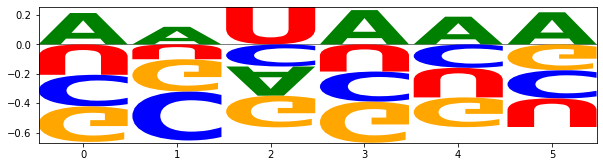

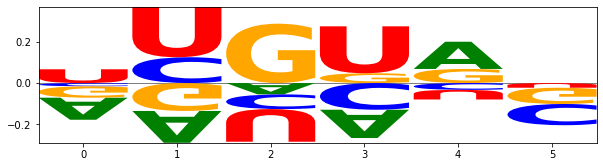

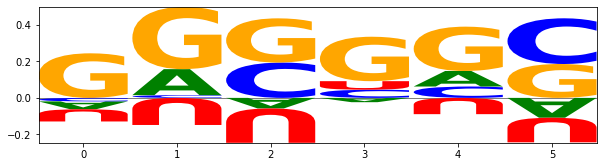

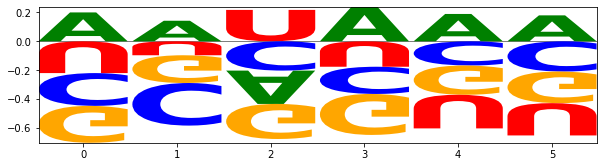

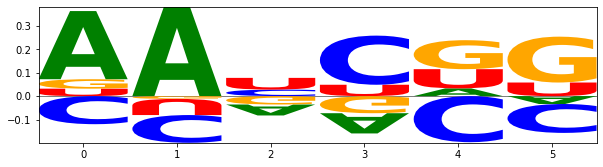

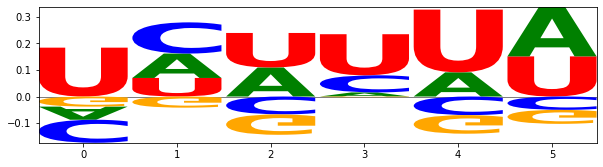

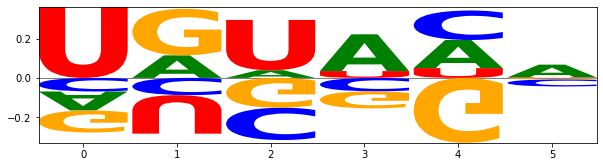

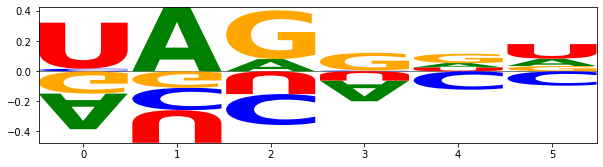

In [48]:
filters,biases = model.layers[2].get_weights()
for i in range(filters.shape[2]):
    df = pd.DataFrame(filters[:,:,i], columns = ['A','U','C','G'], index = [0,1,2,3,4,5])
    logo = lm.Logo(df, font_name = 'Arial Rounded MT Bold')

In [12]:
filters2,biases2 = model.layers[3].get_weights()

In [13]:
filters2[:,:,0]

array([[ 0.21143536],
       [ 0.08172566],
       [ 0.18998872],
       [ 0.11064631],
       [ 0.09506707],
       [ 0.13436097],
       [ 0.01539865],
       [-0.04369863],
       [-0.02604724],
       [ 0.0193771 ],
       [-0.0131974 ],
       [ 0.00776637]], dtype=float32)

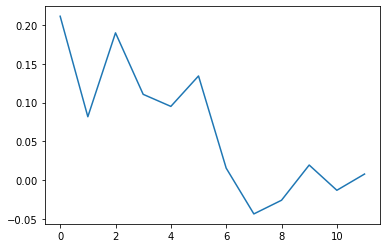

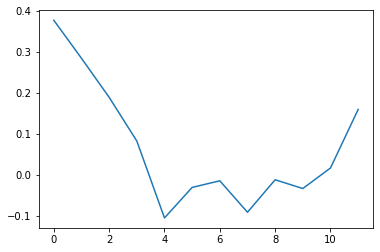

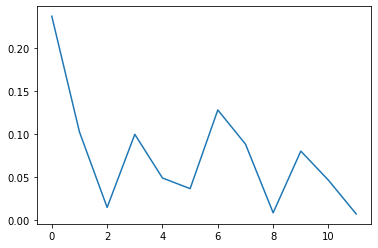

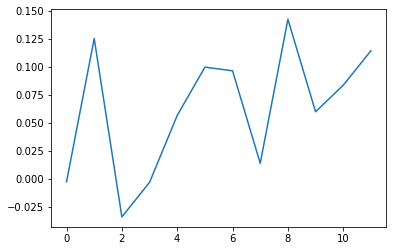

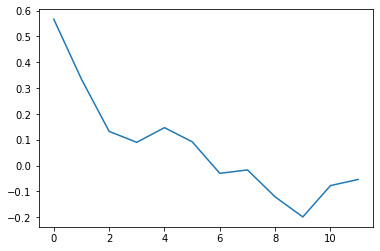

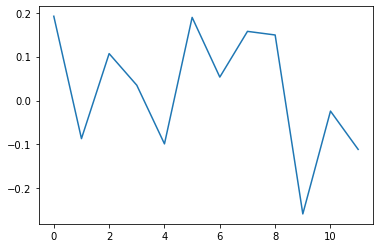

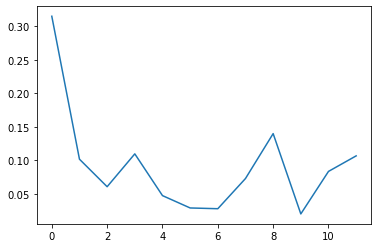

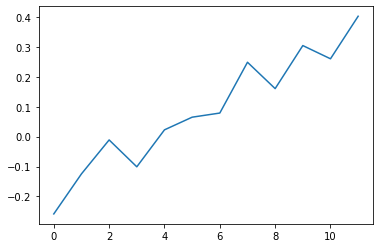

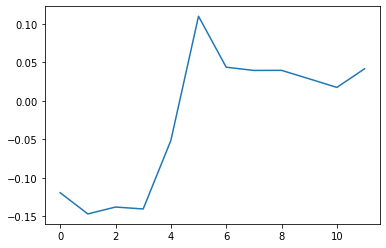

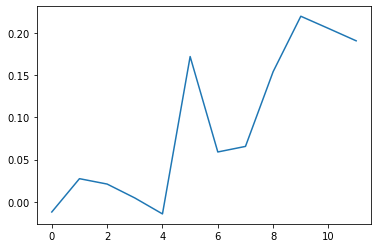

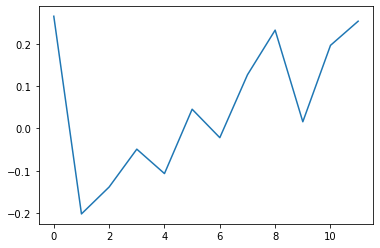

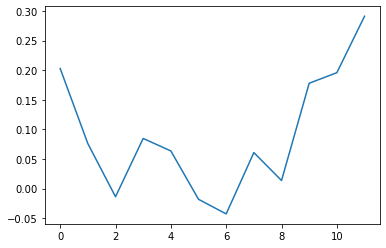

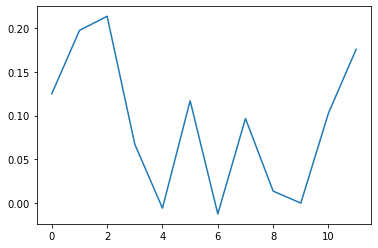

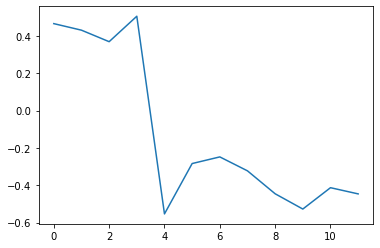

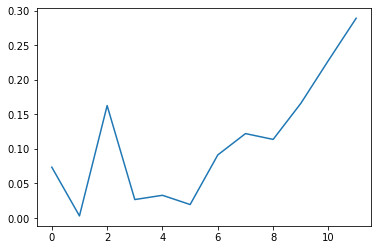

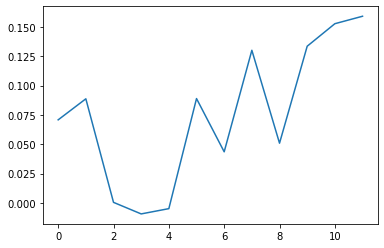

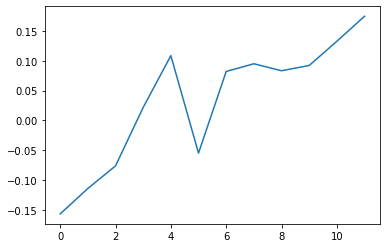

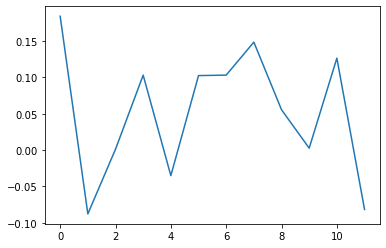

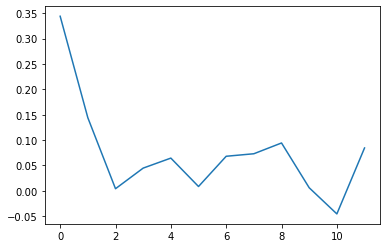

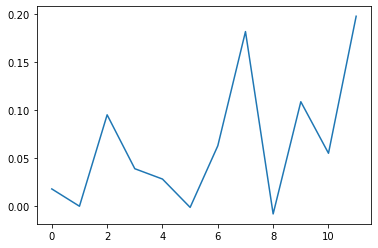

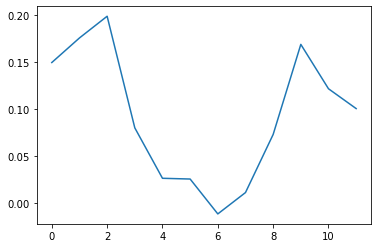

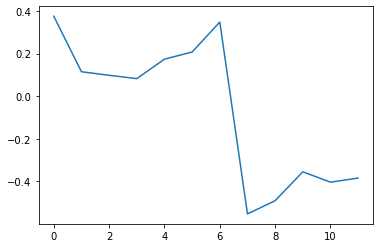

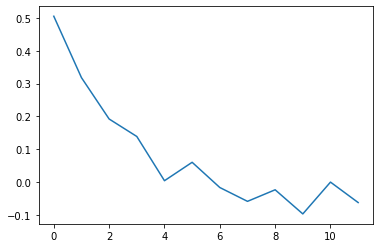

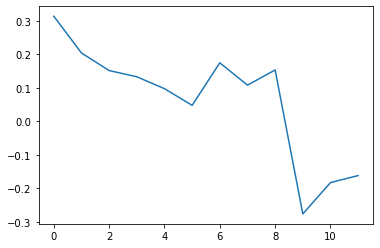

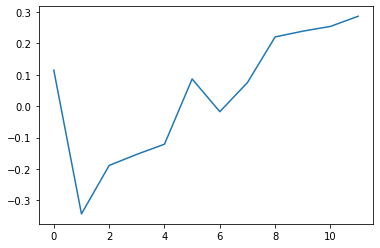

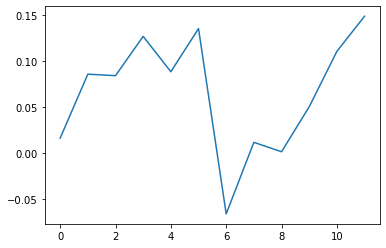

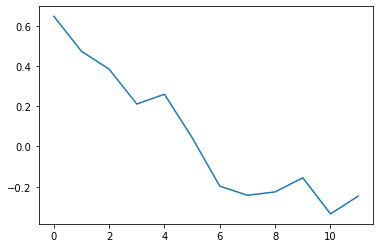

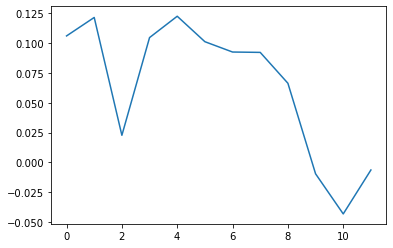

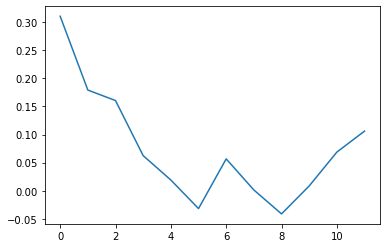

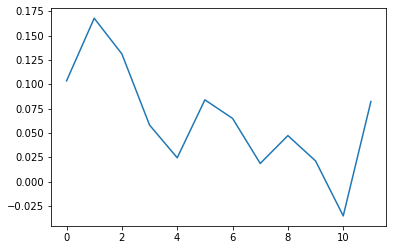

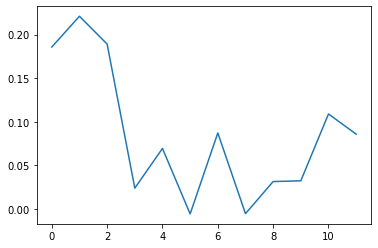

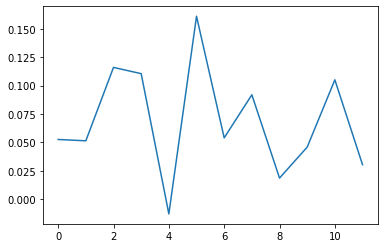

In [15]:
import matplotlib.pyplot as plt

for i in range(32):
    plt.plot(range(12),filters2[:,:,i])
    plt.show()

In [31]:
a = {1:4,5:3,2:4}
l = list(a.keys())
l.sort(reverse=True)
for i in l:
    print(i)

5
2
1
